In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

In [2]:
train = pd.read_csv('../data/train_dataset.csv')
train

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,159.20,180,0,3,83,1,75,0,0,0,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,145.10,110,0,3,21,1,16,0,0,0,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,120.20,70,0,1,59,0,1,0,0,0,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,167.42,90,0,3,78,1,26,0,0,0,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,101.00,80,0,3,70,1,44,0,0,0,1,0,522,0,64,59,0,0,0,648
5,52795d470db4478584f6c92f66af0294,1,39,0,0,0,78,0,0.00,113.76,103.60,180,0,1,146,1,62,0,0,0,1,1,11205,5,7526,11178,21,0,56,656
6,0d758e1b10cc4f618dda9f87fc948068,1,31,0,0,0,65,1,99.80,162.98,217.78,60,0,3,117,1,74,1,0,0,1,1,531,0,3701,20163,0,0,0,612
7,b05585f9635245f282bf2cffd3c5773c,1,28,0,0,0,27,1,29.94,86.25,85.83,130,0,2,43,0,0,0,0,0,0,0,28,0,58,173,0,0,0,628
8,acde81ca14eb429a983bec773e16098c,1,23,0,0,0,41,1,49.90,22.81,24.89,60,0,2,35,1,58,0,0,0,1,0,754,0,2773,2589,0,2,0,547
9,1f78ee310e9d48449b8d5a1fd1537286,1,51,0,0,0,42,1,29.94,23.51,23.00,30,0,1,7,0,0,0,0,0,0,0,103,0,47,2,0,0,0,599


In [3]:
columns_name = ['user_id','is_real_name','age','is_college','is_blacklist','is_abnormal_4g','use_time',
               'last_paytime','last_paymoney','last_6_month_mean_pay','this_month_bills','this_month_balance',
               'is_arrears','bill_sense','call_people_num','is_shop','last_3_month_mall_num','is_wanda','is_vip',
               'is_movie','is_trip','is_sports','is_taobao_num','is_shunfen_num','is_bankapp_num','is_vedioapp_num',
               'is_planeapp_num','is_trainapp_num','is_tripapp_num']
test = pd.read_csv('../data/test_dataset.csv',header=0,names=columns_name)

columns_name.append('score')

train = pd.read_csv('../data/train_dataset.csv',header=0,names=columns_name)
train

,user_id,is_real_name,age,is_college,is_blacklist,is_abnormal_4g,use_time,last_paytime,last_paymoney,last_6_month_mean_pay,this_month_bills,this_month_balance,is_arrears,bill_sense,call_people_num,is_shop,last_3_month_mall_num,is_wanda,is_vip,is_movie,is_trip,is_sports,is_taobao_num,is_shunfen_num,is_bankapp_num,is_vedioapp_num,is_planeapp_num,is_trainapp_num,is_tripapp_num,score
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,159.20,180,0,3,83,1,75,0,0,0,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,145.10,110,0,3,21,1,16,0,0,0,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,120.20,70,0,1,59,0,1,0,0,0,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,167.42,90,0,3,78,1,26,0,0,0,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,101.00,80,0,3,70,1,44,0,0,0,1,0,522,0,64,59,0,0,0,648
5,52795d470db4478584f6c92f66af0294,1,39,0,0,0,78,0,0.00,113.76,103.60,180,0,1,146,1,62,0,0,0,1,1,11205,5,7526,11178,21,0,56,656
6,0d758e1b10cc4f618dda9f87fc948068,1,31,0,0,0,65,1,99.80,162.98,217.78,60,0,3,117,1,74,1,0,0,1,1,531,0,3701,20163,0,0,0,612
7,b05585f9635245f282bf2cffd3c5773c,1,28,0,0,0,27,1,29.94,86.25,85.83,130,0,2,43,0,0,0,0,0,0,0,28,0,58,173,0,0,0,628
8,acde81ca14eb429a983bec773e16098c,1,23,0,0,0,41,1,49.90,22.81,24.89,60,0,2,35,1,58,0,0,0,1,0,754,0,2773,2589,0,2,0,547
9,1f78ee310e9d48449b8d5a1fd1537286,1,51,0,0,0,42,1,29.94,23.51,23.00,30,0,1,7,0,0,0,0,0,0,0,103,0,47,2,0,0,0,599


## 基本数据分析

/home/owen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 618.05 and sigma = 42.44



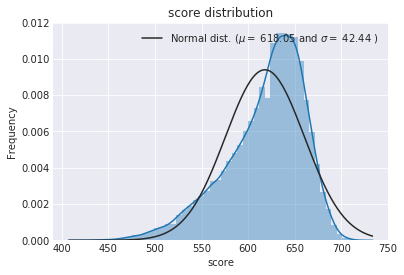

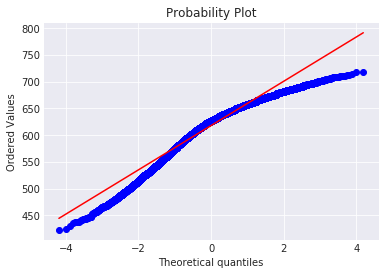

In [4]:
sns.distplot(train['score'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['score'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('score distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['score'], plot=plt)
plt.show()


 mu = 6.43 and sigma = 0.07



/home/owen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


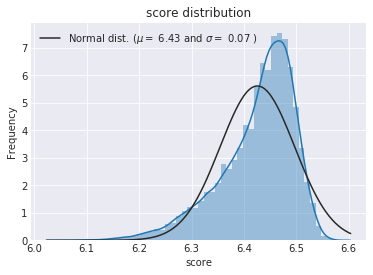

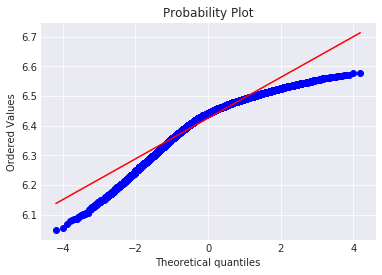

In [20]:
# #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# train["score"] = np.log1p(train["score"])

# #Check the new distribution 
# sns.distplot(train['score'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['score'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('score distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['score'], plot=plt)
# plt.show()

In [4]:
"""
没有缺失值
"""
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], 
                  train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 
                                        'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
3,is_college,2,0.0,99.628,int64
1,is_real_name,2,0.0,99.022,int64
26,is_planeapp_num,150,0.0,98.628,int64
23,is_shunfen_num,192,0.0,98.558,int64
18,is_vip,2,0.0,97.288,int64
17,is_wanda,2,0.0,96.130,int64
4,is_blacklist,2,0.0,95.120,int64
27,is_trainapp_num,139,0.0,95.060,int64
12,is_arrears,2,0.0,94.746,int64
5,is_abnormal_4g,2,0.0,91.142,int64


In [5]:
stats = []
for col in test.columns:
    stats.append((col, test[col].nunique(), test[col].isnull().sum() * 100 / test.shape[0], test[col].value_counts(normalize=True, dropna=False).values[0] * 100, test[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
3,is_college,2,0.0,99.648,int64
1,is_real_name,2,0.0,99.226,int64
26,is_planeapp_num,147,0.0,98.636,int64
23,is_shunfen_num,172,0.0,98.510,int64
18,is_vip,2,0.0,97.302,int64
17,is_wanda,2,0.0,96.024,int64
4,is_blacklist,2,0.0,95.180,int64
27,is_trainapp_num,134,0.0,94.954,int64
12,is_arrears,2,0.0,94.888,int64
5,is_abnormal_4g,2,0.0,91.120,int64


In [8]:
# 删除某一类别占比超过95%的列
good_cols = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.95:
        good_cols.remove(col)
        print(col,rate)

is_real_name 0.99022
is_college 0.99628
is_blacklist 0.9512
is_wanda 0.9613
is_vip 0.97288
is_shunfen_num 0.98558
is_planeapp_num 0.98628
is_trainapp_num 0.9506


In [9]:
good_cols.remove('user_id')
train = train[good_cols]

good_cols.remove('score')
test  = test[good_cols]

# 合并数据集
target = train['score']
del train['score']
data = pd.concat([train,test],axis=0,ignore_index=True)
data = data.fillna(-1)

In [11]:
train = data[:train.shape[0]]
test  = data[train.shape[0]:]
print(train.shape)
print(test.shape)

(50000, 20)
(50000, 20)


In [13]:
X_train = train.values
X_test = test.values

y_train = target.values

In [15]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error
param = {'num_leaves': 120,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'mae',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_absolute_error(oof_lgb, target)))

fold n°1
Training until validation scores don't improve for 100 rounds.
[200]	training's l1: 15.1481	valid_1's l1: 16.0714
[400]	training's l1: 13.6566	valid_1's l1: 15.2198
[600]	training's l1: 13.0109	valid_1's l1: 15.0985
[800]	training's l1: 12.5289	valid_1's l1: 15.0714
[1000]	training's l1: 12.1097	valid_1's l1: 15.0656
Early stopping, best iteration is:
[1001]	training's l1: 12.1077	valid_1's l1: 15.0656
fold n°2
Training until validation scores don't improve for 100 rounds.
[200]	training's l1: 15.2199	valid_1's l1: 15.8119
[400]	training's l1: 13.7255	valid_1's l1: 14.8967
[600]	training's l1: 13.0861	valid_1's l1: 14.748
[800]	training's l1: 12.6095	valid_1's l1: 14.7129
[1000]	training's l1: 12.1923	valid_1's l1: 14.6998
Early stopping, best iteration is:
[1065]	training's l1: 12.066	valid_1's l1: 14.6991
fold n°3
Training until validation scores don't improve for 100 rounds.
[200]	training's l1: 15.2079	valid_1's l1: 15.8634
[400]	training's l1: 13.7117	valid_1's l1: 14.942

In [16]:
##### xgb
import xgboost as xgb

xgb_params = {'eta': 0.005, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'mae', 'silent': True, 'nthread': 4}

folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_xgb = np.zeros(len(train))
predictions_xgb = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])

    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
print("CV score: {:<8.8f}".format(mean_absolute_error(oof_xgb, target)))

fold n°1
[0]	train-mae:614.318	valid_data-mae:615.061
Multiple eval metrics have been passed: 'valid_data-mae' will be used for early stopping.

Will train until valid_data-mae hasn't improved in 200 rounds.
[100]	train-mae:372.211	valid_data-mae:372.714
[200]	train-mae:225.537	valid_data-mae:225.892
[300]	train-mae:136.687	valid_data-mae:136.945
[400]	train-mae:82.9277	valid_data-mae:83.2141
[500]	train-mae:50.6464	valid_data-mae:51.201
[600]	train-mae:31.8472	valid_data-mae:32.9072
[700]	train-mae:21.585	valid_data-mae:23.2115
[800]	train-mae:16.4701	valid_data-mae:18.6225
[900]	train-mae:14.1064	valid_data-mae:16.6257
[1000]	train-mae:12.9681	valid_data-mae:15.7778
[1100]	train-mae:12.3326	valid_data-mae:15.4083
[1200]	train-mae:11.9301	valid_data-mae:15.2413
[1300]	train-mae:11.6275	valid_data-mae:15.1572
[1400]	train-mae:11.3846	valid_data-mae:15.1107
[1500]	train-mae:11.1616	valid_data-mae:15.0833
[1600]	train-mae:10.9577	valid_data-mae:15.0677
[1700]	train-mae:10.7629	valid_data

In [17]:
# 将lgb和xgb的结果进行stacking
from sklearn.linear_model import BayesianRidge
train_stack = np.vstack([oof_lgb,oof_xgb]).transpose()
test_stack = np.vstack([predictions_lgb, predictions_xgb]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=4590)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values
    
    clf_3 = BayesianRidge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
mean_absolute_error(target.values, oof_stack)

fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9


14.738639877183267

In [21]:
sub = pd.read_csv('../data/submit_example.csv')
sub = sub[['id']]
sub['score'] = predictions
sub.score = sub.score.apply(lambda x: int(x))
sub

,id,score
0,7171737d49b143d1b38883a39e4a5730,602
1,3af0a449d5424488912e8fb2bf4b9faa,533
2,eb2cf02e0d5c4d1294dd73e776dbb441,669
3,9c0f780ecb254670a11aa9e3f10777c5,675
4,d794eed46c1e44f785a575f18b3023a5,657
5,18f6a7d824a1421b9da3e5f10854c3df,614
6,e7b63888a36f499a88811c0936bb12df,639
7,f995ef4d96fc426191a104421b0f5b20,572
8,11a3ce45ce234f7db4e91e5f152dc8b8,673
9,86ebeac087284c87bbcb1281d95ef9eb,590


In [22]:
import datetime
now = datetime.datetime.now()
now = now.strftime('%m-%d-%H-%M')
sub.to_csv('../result/yubaselin_%s.csv'%now,index=0)

In [ ]:
## 后向搜索特征选择算法
def modeling_cross_validation(params, X, y, nr_folds=5):
    
    oof_preds = np.zeros(X.shape[0])
    # Split data with kfold
    folds = KFold(n_splits=nr_folds, shuffle=False, random_state=4096)
    
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
        print("fold n°{}".format(fold_+1))
        trn_data = lgb.Dataset(X[trn_idx], y[trn_idx])
        val_data = lgb.Dataset(X[val_idx], y[val_idx])

        num_round = 20000
        clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 100)
        oof_preds[val_idx] = clf.predict(X[val_idx], num_iteration=clf.best_iteration)

    score = mean_squared_error(oof_preds, target)
    
    return  score/2

In [ ]:
def featureSelect(init_cols):
    params = {'num_leaves': 120,
             'min_data_in_leaf': 30, 
             'objective':'regression',
             'max_depth': -1,
             'learning_rate': 0.05,
             "min_child_samples": 30,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'mse',
             "lambda_l1": 0.02,
             "verbosity": -1}
    best_cols = init_cols.copy()
    best_score = modeling_cross_validation(params, train[init_cols].values, target.values, nr_folds=5)
    print("初始CV score: {:<8.8f}".format(best_score))
    for f in init_cols:

        best_cols.remove(f)
        score = modeling_cross_validation(params, train[best_cols].values, target.values, nr_folds=5)
        diff = best_score - score
        print('-'*10)
        if diff > 0.0000002:
            print("当前移除特征: {}, CV score: {:<8.8f}, 最佳cv score: {:<8.8f}, 有效果,删除！！".format(f,score,best_score))
            best_score = score
        else:
            print("当前移除特征: {}, CV score: {:<8.8f}, 最佳cv score: {:<8.8f}, 没效果,保留！！".format(f,score,best_score))
            best_cols.append(f)
    print('-'*10)
    print("优化后CV score: {:<8.8f}".format(best_score))
    
    return best_cols
    
best_features = featureSelect(train.columns.tolist())